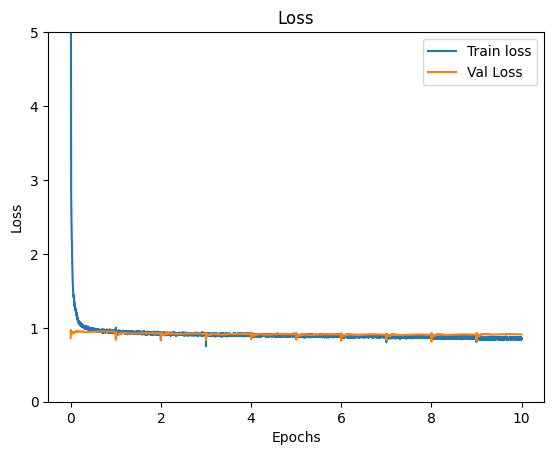

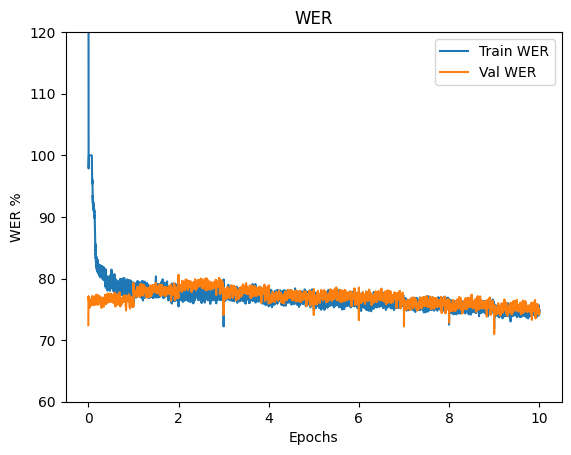

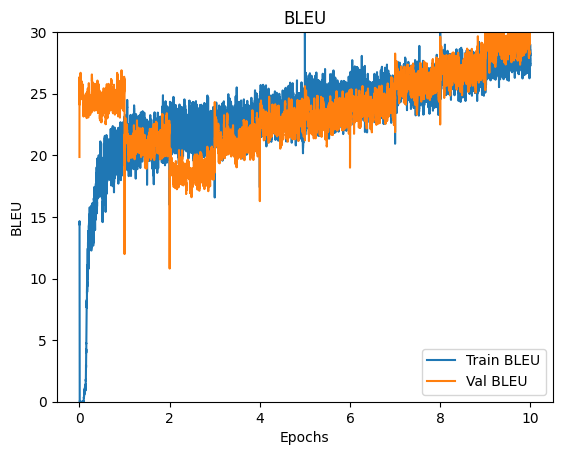

In [1]:
import matplotlib.pyplot as plt
import numpy as np

f1 = open( './model/MyOriginal_train_loss_20251003_064440.csv')
f2 = open( './model/MyOriginal_val_loss_20251003_064440.csv')

line1 = f1.readline()
line1 = line1.replace( "\n", "")
len_tr_loader = int(line1)
line1 = f1.readline()

line2 = f2.readline()
line2 = line2.replace( "\n", "")
len_val_loader = int(line2)
line2 = f2.readline()

i = 0
x = []
loss = []
moving_avg = len_tr_loader
moving_avg_loss = []
error = []
bleu = []
v_i = 0
v_x = []
v_loss = []
num_v_epoch = len_val_loader
v_epoch = []
v_epoch_avg_loss = []
v_error = []
v_bleu = []

while line1:
    #print( line1 )
    line1_split = line1.split(",")
    #print( line1_split[0])
    i += 1
    x.append( i / len_tr_loader )
    loss.append( float(line1_split[1].split(' ')[1]) )
    error.append( float(line1_split[2].split(' ')[1]) )
    bleu.append( float(line1_split[3].split( ' ' )[1]))
    line1 = f1.readline()
    line1 = line1.replace( "\n", "")

for i in range( len( loss ) ):
    if i < moving_avg:
        moving_avg_loss.append( float('inf') )
    elif i < len(loss) - moving_avg:
        moving_avg_loss.append( np.mean( loss[i: i+ moving_avg - 1 ] ) )
    else:
        moving_avg_loss.append( np.mean( loss[i: len(loss) ] ) )

while line2:
    #print( line1 )
    line2_split = line2.split(",")
    #print( line2_split)
    v_i += 1
    v_x.append( v_i / len_val_loader )
    v_loss.append( float(line2_split[1].split(' ')[1]) )
    #print( line2_split[2].split(' ')[2])
    v_error.append( float(line2_split[2].split(' ')[2] ) )
    v_bleu.append( float(line2_split[3].split( ' ' )[1]))
    line2 = f2.readline()
    line2 = line2.replace( "\n", "")

for i in range( 0, len(v_loss), num_v_epoch):
    v_epoch.append( i / num_v_epoch )
    v_epoch_avg_loss.append( np.mean( v_loss[ i: i+num_v_epoch - 1 ] ) )

f1.close()
f2.close()

#plt.plot( x[:-15], moving_avg_loss[:-15], label="Train moving avg loss" )
plt.plot( x, loss, label="Train loss")
#plt.plot( v_epoch, v_epoch_avg_loss, label="Val epoch avg loss" )
plt.plot( v_x, v_loss, label="Val Loss" )
plt.title( "Loss")
plt.xlabel( 'Epochs')
plt.ylabel( 'Loss')
plt.legend()
plt.ylim( 0, 5 )
plt.show()

plt.plot( x, error, label = 'Train WER')
plt.plot( v_x, v_error, label="Val WER")
plt.title( "WER")
plt.xlabel( 'Epochs')
plt.ylabel( 'WER %')
plt.legend()
plt.ylim( 60, 120)
plt.show()

plt.plot( x, bleu, label = 'Train BLEU')
plt.plot( v_x, v_bleu, label="Val BLEU")
plt.title( "BLEU")
plt.xlabel( 'Epochs')
plt.ylabel( 'BLEU')
plt.legend()
plt.ylim( 0, 30 )
plt.show()


#plt.plot( v_x, v_loss)
#plt.title( "Validation Loss")
#plt.xlabel( 'Epochs')
#plt.ylabel( 'Loss')

#plt.show()

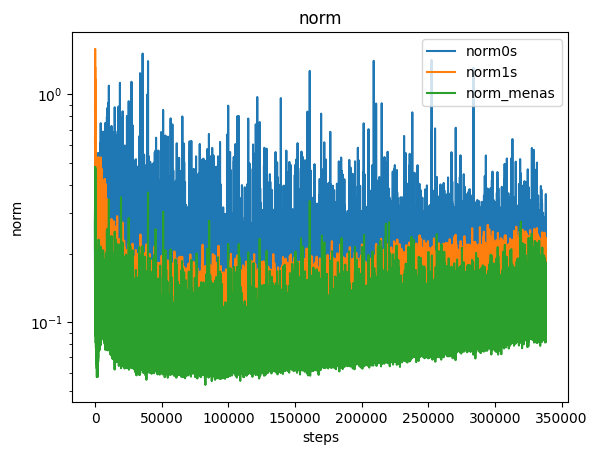

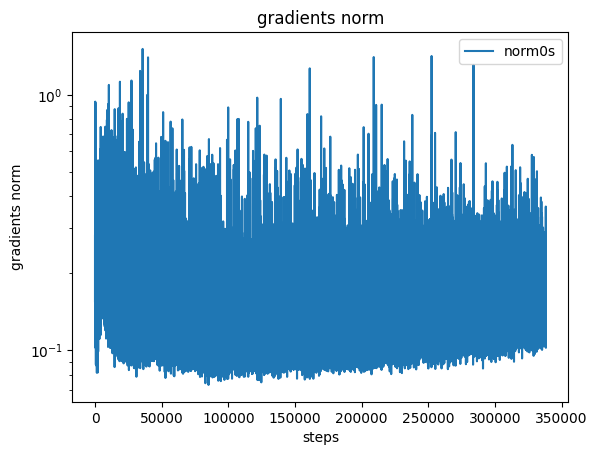

In [2]:
f_norm = open( "./model/norm_20251003_064440.csv", "r", encoding='UTF-8')

epochs = []
steps = []
norm0s = []
norm1s = []
norm_means = []

for i, line in enumerate( f_norm ):
    line_split = line.split( ", " )
    #print( "line_split:", line_split )
    steps.append( float( line_split[1].split(": ")[1] ) )
    norm0s.append( float( line_split[2].split(": ")[1] ) )
    norm1s.append( float( line_split[3].split(": ")[1] ) )
    norm_means.append( float( line_split[4].split(": ")[1] ) )
    #print( "norm_means:", norm_means[i] )
f_norm.close()

plt.plot( steps, norm0s, label = 'norm0s')
plt.plot( steps, norm1s, label = 'norm1s')
plt.plot( steps, norm_means, label = 'norm_menas')
plt.title( "norm")
plt.xlabel( 'steps')
plt.ylabel( 'norm')
plt.yscale( 'log' )
plt.legend()
#plt.ylim( 0, 2 )
plt.show()

plt.plot( steps, norm0s, label = 'norm0s')
plt.title( "gradients norm")
plt.xlabel( 'steps')
plt.ylabel( 'gradients norm')
plt.yscale( 'log' )
plt.legend()
#plt.ylim( 0, 1.0 )
plt.show()